In [1]:
from toronto_lat_long import df_toronto_merge

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"737efdfa-b9ad-49d0-ae15-4992c2d1779a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":979555370,"wgRevisionId":979555370,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Communicati

In [2]:
df_toronto_merge.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [3]:
print('Total Borough {} and Total Neighborhood {}'.format( len(df_toronto_merge['Borough'].unique()), len(df_toronto_merge['Neighborhood'])))

Total Borough 10 and Total Neighborhood 103


In [4]:
df_toronto_merge['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

In [5]:
df_toronto_merge['Neighborhood']

0                                              Parkwoods
1                                       Victoria Village
2                              Regent Park, Harbourfront
3                       Lawrence Manor, Lawrence Heights
4            Queen's Park, Ontario Provincial Government
                             ...                        
98         The Kingsway, Montgomery Road, Old Mill North
99                                  Church and Wellesley
100    Business reply mail Processing Centre, South C...
101    Old Mill South, King's Mill Park, Sunnylea, Hu...
102    Mimico NW, The Queensway West, South of Bloor,...
Name: Neighborhood, Length: 103, dtype: object

In [4]:
from foursquare_account import CLIENT_ID, CLIENT_SECRET, VERSION, LIMIT

In [7]:
from geopy.geocoders import Nominatim

In [8]:
def koordinat(tempat):
    lat  = Nominatim(user_agent='foursquare_agent').geocode(tempat).latitude
    long = Nominatim(user_agent='foursquare_agent').geocode(tempat).longitude
    return [lat,long]

In [9]:
koordinat('Toronto, Ontario')

[43.6534817, -79.3839347]

In [10]:
import folium # plotting library

In [11]:
map_toronto = folium.Map(location=koordinat('Toronto, Ontario'), zoom_start=10)
map_toronto

In [12]:
import requests
import pandas as pd

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [14]:
toronto_venues = getNearbyVenues(names=df_toronto_merge['Neighborhood'],
                                   latitudes=df_toronto_merge['Latitude'],
                                   longitudes=df_toronto_merge['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [15]:
print('shape', toronto_venues.shape)
toronto_venues.head()

shape (2136, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [16]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
...,...,...,...,...,...,...
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,4,4,4,4,4,4
Woodbine Heights,7,7,7,7,7,7


In [17]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 273 uniques categories.


In [18]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

print(toronto_onehot.shape)
toronto_onehot.head()

(2136, 273)


,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [31]:
import numpy as np

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Sandwich Place,Coffee Shop,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Frozen Yogurt Shop,Shopping Mall,Bridal Shop,Sandwich Place,Diner,Restaurant,Deli / Bodega,Supermarket
3,Bayview Village,Café,Japanese Restaurant,Chinese Restaurant,Bank,Women's Store,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Italian Restaurant,Greek Restaurant,Sushi Restaurant,Pharmacy,Pizza Place,Pub,Café,Restaurant


In [33]:
# set number of clusters
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
toronto_grouped_clustering

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
from yellowbrick.cluster import KElbowVisualizer

In [35]:
class _KMeans_():
    def __init__(self, dataset, k_start, k_end):
        self.data = dataset
        self.k_start = k_start
        self.k_end = k_end
        
    def _Distortion(self):
        return KElbowVisualizer(KMeans(), k=(self.k_start, self.k_end)).fit(self.data).show()        
     
    def klabel(self, k):
        return KMeans(init="k-means++", n_clusters=k, random_state=0).fit(self.data).labels_

In [36]:
P1 = _KMeans_(toronto_grouped_clustering, 2, 12)
      

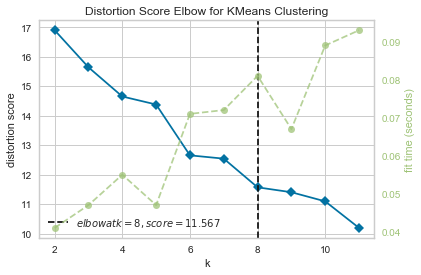

In [37]:
P1._Distortion()

In [100]:
labell = P1.klabel(8)
labell[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [101]:
neighborhoods_venues_sorted['Cluster Labels']=labell

In [102]:
#neighborhoods_venues_sorted.drop(columns=['Cluster Labels'], inplace=True)
neighborhoods_venues_sorted = neighborhoods_venues_sorted[['Neighborhood', 'Cluster Labels', '1st Most Common Venue', '2nd Most Common Venue',
       '3rd Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue'
      ]]

In [103]:
neighborhoods_venues_sorted

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,0,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,"Alderwood, Long Branch",0,Pizza Place,Pharmacy,Gym,Sandwich Place,Coffee Shop,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",0,Coffee Shop,Bank,Frozen Yogurt Shop,Shopping Mall,Bridal Shop,Sandwich Place,Diner,Restaurant,Deli / Bodega,Supermarket
3,Bayview Village,0,Café,Japanese Restaurant,Chinese Restaurant,Bank,Women's Store,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
4,"Bedford Park, Lawrence Manor East",0,Coffee Shop,Sandwich Place,Italian Restaurant,Greek Restaurant,Sushi Restaurant,Pharmacy,Pizza Place,Pub,Café,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",0,Pizza Place,Grocery Store,Coffee Shop,Butcher,Pharmacy,Greek Restaurant,Escape Room,Eastern European Restaurant,Dumpling Restaurant,Drugstore
92,Woburn,0,Coffee Shop,Mexican Restaurant,Korean Restaurant,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
93,Woodbine Heights,0,Skating Rink,Park,Athletics & Sports,Beer Store,Dance Studio,Curling Ice,Women's Store,Donut Shop,Distribution Center,Dog Run
94,York Mills West,6,Park,Convenience Store,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


In [65]:
neighborhoods_venues_sorted.astype({'Cluster Labels':'int32'})

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,1,Lounge,Skating Rink,Latin American Restaurant,Breakfast Spot,Clothing Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,"Alderwood, Long Branch",1,Pizza Place,Pharmacy,Gym,Sandwich Place,Coffee Shop,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",1,Coffee Shop,Bank,Frozen Yogurt Shop,Shopping Mall,Bridal Shop,Sandwich Place,Diner,Restaurant,Deli / Bodega,Supermarket
3,Bayview Village,1,Café,Japanese Restaurant,Chinese Restaurant,Bank,Women's Store,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
4,"Bedford Park, Lawrence Manor East",1,Coffee Shop,Sandwich Place,Italian Restaurant,Greek Restaurant,Sushi Restaurant,Pharmacy,Pizza Place,Pub,Café,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",1,Pizza Place,Grocery Store,Coffee Shop,Butcher,Pharmacy,Greek Restaurant,Escape Room,Eastern European Restaurant,Dumpling Restaurant,Drugstore
92,Woburn,1,Coffee Shop,Mexican Restaurant,Korean Restaurant,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
93,Woodbine Heights,1,Skating Rink,Park,Athletics & Sports,Beer Store,Dance Studio,Curling Ice,Women's Store,Donut Shop,Distribution Center,Dog Run
94,York Mills West,0,Park,Convenience Store,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


In [104]:
toronto_merged = df_toronto_merge.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

In [76]:
import matplotlib.cm as cm
import matplotlib.colors as colors


In [108]:
toronto_merged.astype({'Cluster Labels':'int32'})

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,6,Food & Drink Shop,Park,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Women's Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,0,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,Intersection,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Yoga Studio,Shoe Store,French Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0,Clothing Store,Women's Store,Coffee Shop,Boutique,Furniture / Home Store,Gift Shop,Event Space,Accessories Store,Vietnamese Restaurant,Convenience Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0,Coffee Shop,Yoga Studio,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Restaurant,Café,Portuguese Restaurant,Chinese Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,0,River,Pool,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Yoga Studio,Bubble Tea Shop,Pub,Café,Men's Store
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,0,Skate Park,Light Rail Station,Butcher,Recording Studio,Auto Workshop,Burrito Place,Garden,Garden Center,Farmers Market,Fast Food Restaurant
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,4,Baseball Field,Construction & Landscaping,Women's Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


In [109]:
toronto_merged.isna().sum()

PostalCode                0
Borough                   0
Neighborhood              0
Latitude                  0
Longitude                 0
Cluster Labels            0
1st Most Common Venue     0
2nd Most Common Venue     0
3rd Most Common Venue     0
4th Most Common Venue     0
5th Most Common Venue     0
6th Most Common Venue     0
7th Most Common Venue     0
8th Most Common Venue     0
9th Most Common Venue     0
10th Most Common Venue    0
dtype: int64

In [107]:
toronto_merged.dropna(axis=0, inplace=True)

In [110]:
toronto_merged

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,6.0,Food & Drink Shop,Park,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Women's Store
1,M4A,North York,Victoria Village,43.725882,-79.315572,0.0,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,Intersection,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,0.0,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Yoga Studio,Shoe Store,French Restaurant
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,0.0,Clothing Store,Women's Store,Coffee Shop,Boutique,Furniture / Home Store,Gift Shop,Event Space,Accessories Store,Vietnamese Restaurant,Convenience Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,0.0,Coffee Shop,Yoga Studio,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Restaurant,Café,Portuguese Restaurant,Chinese Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,0.0,River,Pool,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,0.0,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Yoga Studio,Bubble Tea Shop,Pub,Café,Men's Store
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,0.0,Skate Park,Light Rail Station,Butcher,Recording Studio,Auto Workshop,Burrito Place,Garden,Garden Center,Farmers Market,Fast Food Restaurant
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,4.0,Baseball Field,Construction & Landscaping,Women's Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


In [111]:
toronto_merged.drop(columns=['PostalCode'], inplace=True)

In [112]:
b= toronto_merged.astype({'Cluster Labels':'int32'})['Cluster Labels'][:]

In [113]:
kclusters = 8
# create map
map_clusters = folium.Map([43.6534817, -79.3839347], zoom_start=11)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], b):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Examine Clusters :

In [114]:
num = 1
for yyy in range(kclusters):
    print('Cluster',num)
    #display(toronto_merged.loc[b == yyy, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]])
    ddd = toronto_merged[toronto_merged['Cluster Labels']==yyy][['Neighborhood',	'1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue','4th Most Common Venue','5th Most Common Venue','6th Most Common Venue','7th Most Common Venue','8th Most Common Venue','9th Most Common Venue','10th Most Common Venue']]
    display(ddd)
    print(ddd.shape)
    print()
    num+=1

Cluster 1


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,Intersection,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store
2,"Regent Park, Harbourfront",Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Yoga Studio,Shoe Store,French Restaurant
3,"Lawrence Manor, Lawrence Heights",Clothing Store,Women's Store,Coffee Shop,Boutique,Furniture / Home Store,Gift Shop,Event Space,Accessories Store,Vietnamese Restaurant,Convenience Store
4,"Queen's Park, Ontario Provincial Government",Coffee Shop,Yoga Studio,Bank,Beer Bar,Smoothie Shop,Sandwich Place,Restaurant,Café,Portuguese Restaurant,Chinese Restaurant
7,Don Mills,Gym,Japanese Restaurant,Beer Store,Coffee Shop,Restaurant,Supermarket,Café,Discount Store,Dim Sum Restaurant,Caribbean Restaurant
...,...,...,...,...,...,...,...,...,...,...,...
97,"First Canadian Place, Underground city",Coffee Shop,Café,Hotel,American Restaurant,Gym,Restaurant,Japanese Restaurant,Steakhouse,Asian Restaurant,Salad Place
98,"The Kingsway, Montgomery Road, Old Mill North",River,Pool,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
99,Church and Wellesley,Coffee Shop,Japanese Restaurant,Gay Bar,Sushi Restaurant,Restaurant,Yoga Studio,Bubble Tea Shop,Pub,Café,Men's Store
100,"Business reply mail Processing Centre, South C...",Skate Park,Light Rail Station,Butcher,Recording Studio,Auto Workshop,Burrito Place,Garden,Garden Center,Farmers Market,Fast Food Restaurant


(83, 11)

Cluster 2


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
49,"North Park, Maple Leaf Park, Upwood Park",Park,Construction & Landscaping,Bakery,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
68,"Forest Hill North & West, Forest Hill Road Park",Trail,Park,Sushi Restaurant,Jewelry Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
83,"Moore Park, Summerhill East",Trail,Playground,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Women's Store
85,"Milliken, Agincourt North, Steeles East, L'Amo...",Park,Playground,Bakery,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
91,Rosedale,Park,Trail,Playground,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant


(5, 11)

Cluster 3


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
45,"York Mills, Silver Hills",Martial Arts School,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant


(1, 11)

Cluster 4


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"West Deane Park, Princess Gardens, Martin Grov...",Print Shop,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Women's Store,Dessert Shop


(1, 11)

Cluster 5


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,"Humberlea, Emery",Baseball Field,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Women's Store,Fast Food Restaurant
101,"Old Mill South, King's Mill Park, Sunnylea, Hu...",Baseball Field,Construction & Landscaping,Women's Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


(2, 11)

Cluster 6


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Malvern, Rouge",Fast Food Restaurant,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Wings Joint


(1, 11)

Cluster 7


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,Food & Drink Shop,Park,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Women's Store
21,Caledonia-Fairbanks,Park,Women's Store,Pool,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
35,"East Toronto, Broadview North (Old East York)",Intersection,Park,Convenience Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
61,Lawrence Park,Park,Swim School,Bus Line,Women's Store,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
64,Weston,Park,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
66,York Mills West,Park,Convenience Store,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


(6, 11)

Cluster 8


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
62,Roselawn,Garden,Music Venue,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop,Department Store


(1, 11)

